# Matplotlib可视化最有价值的50个图表 -- 林肯叔叔精注版 2021年07月02日


本文总结了50个图表绘制方法，对于数据分析的可视化有莫大的作用。


**Tips：** 

* 本文原文部分代码有不准确的地方，已进行修改； 

* 所有正确的源代码，已整合到 jupyter notebook 文件中； 

* 运行本文代码，除了安装 matplotlib 和 seaborn 可视化库外，还需要安装其他的一些辅助可视化库，已在代码部分作标注，具体内容请查看下面文章内容。

在数据分析和可视化中最有用的 50 个 Matplotlib 图表。 这些图表列表允许您使用 python 的 matplotlib 和 seaborn 库选择要显示的可视化对象。

## **介绍**

这些图表根据可视化目标的7个不同情景进行分组。 例如，如果要想象两个变量之间的关系，请查看“关联”部分下的图表。 或者，如果您想要显示值如何随时间变化，请查看“变化”部分，依此类推。

![](https://image.jiqizhixin.com/uploads/editor/454c2f4b-0dab-4ff5-96d7-d46ef0955a36/640.png)

**有效图表的重要特征：**

* 在不歪曲事实的情况下传达正确和必要的信息。

* 设计简单，您不必太费力就能理解它。

* 从审美角度支持信息而不是掩盖信息。

* 信息没有超负荷。

## 关于一个图表，你需要了解的基础




## **准备工作**

在代码运行前先引入下面的设置内容。 当然，单独的图表，可以重新设置显示要素。

In [ ]:
# brewer2mpl is a pure Python package for accessing colorbrewer2.org color maps from Python. 
# With brewer2mpl you can get the raw RGB colors of all 165 colorbrewer2.org color maps. 
# The color map data ships with brewer2mpl so no internet connection is required.

# https://pypi.org/project/brewer2mpl/

!pip install brewer2mpl

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 1.5 MB 569 kB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
# !pip install brewer2mpl


## 如果你要在 Python 中作图，下面这几句常用做法
import numpy as np # 导入 numpy
import pandas as pd # 导入 pandas
import matplotlib as mpl # 导入 matplotlib
import matplotlib.pyplot as plt # 单独导入 pyplot
import seaborn as sns #导入 seaborn
import warnings; warnings.filterwarnings(action='once') # 解决报警告的问题



# 定义 3 个变量，分别代表字号大小，22 号，16 号，12 号
large = 22; med = 16; small = 12


## 在使用matplotlib模块时画坐标图时，往往需要对坐标轴设置很多参数，这些参数包括横纵坐标轴范围、坐标轴刻度大小、坐标轴名称等 
## 在matplotlib中包含了很多函数，用来对这些参数进行设置。

## plt.xlim、plt.ylim     设置横纵坐标轴范围 
## plt.xlabel、plt.ylabel 设置坐标轴名称 
## plt.xticks、plt.yticks 设置坐标轴刻度



# 设置相关字号大小

params = {'axes.titlesize': large,

          'legend.fontsize': med,

          'figure.figsize': (16, 10),

          'axes.labelsize': med,

          'axes.titlesize': med,

          'xtick.labelsize': med,

          'ytick.labelsize': med,

          'figure.titlesize': large}

plt.rcParams.update(params)

plt.style.use('seaborn-whitegrid')

sns.set_style("white")

%matplotlib inline



# Version

print(mpl.__version__)  #> 3.0.0

print(sns.__version__)  #> 0.9.0

3.1.3
0.10.0


## **一、关联 （Correlation）**

关联图表用于可视化2个或更多变量之间的关系。 也就是说，一个变量如何相对于另一个变化。

### 1. 散点图（Scatter plot）

散点图是用于研究两个变量之间关系的经典的和基本的图表。 如果数据中有多个组，则可能需要以不同颜色可视化每个组。 在 matplotlib 中，您可以使用 plt.scatterplot（） 方便地执行此操作。

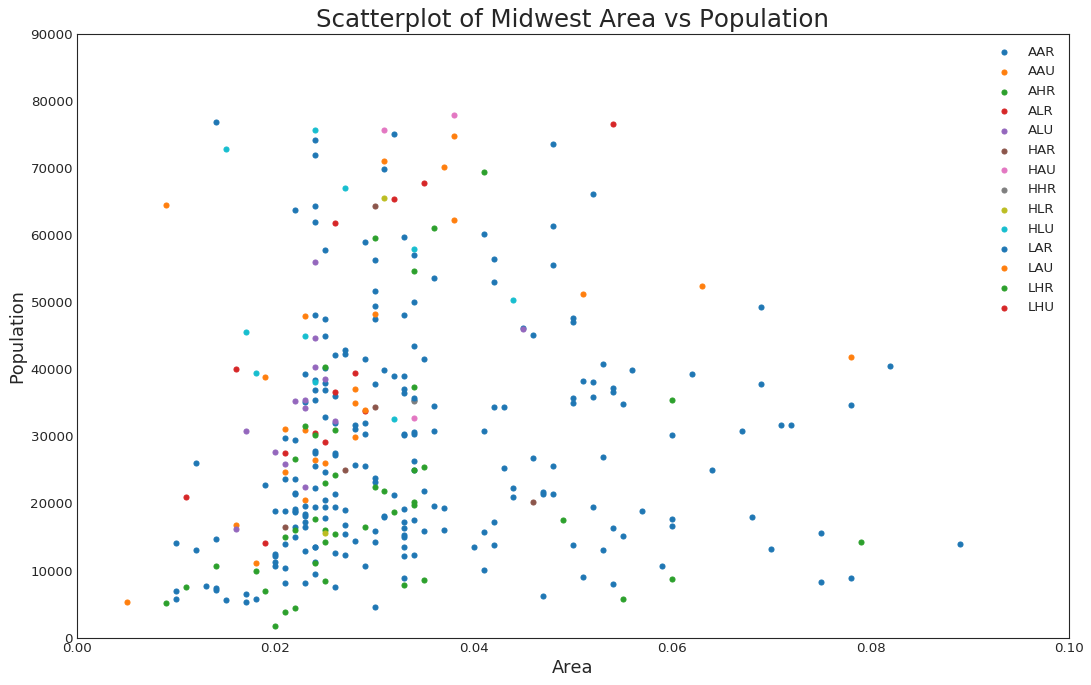

In [3]:
# Import dataset
midwest = pd.read_csv("./mat50datas/midwest_filter.csv")


# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]



# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')



for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category==category, :],
                s=20, cmap=colors[i], label=str(category))



# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')



plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

### 2. 带边界的气泡图（Bubble plot with Encircling）

有时，您希望在边界内显示一组点以强调其重要性。 在这个例子中，你从数据框中获取记录，并用下面代码中描述的 encircle（） 来使边界显示出来。

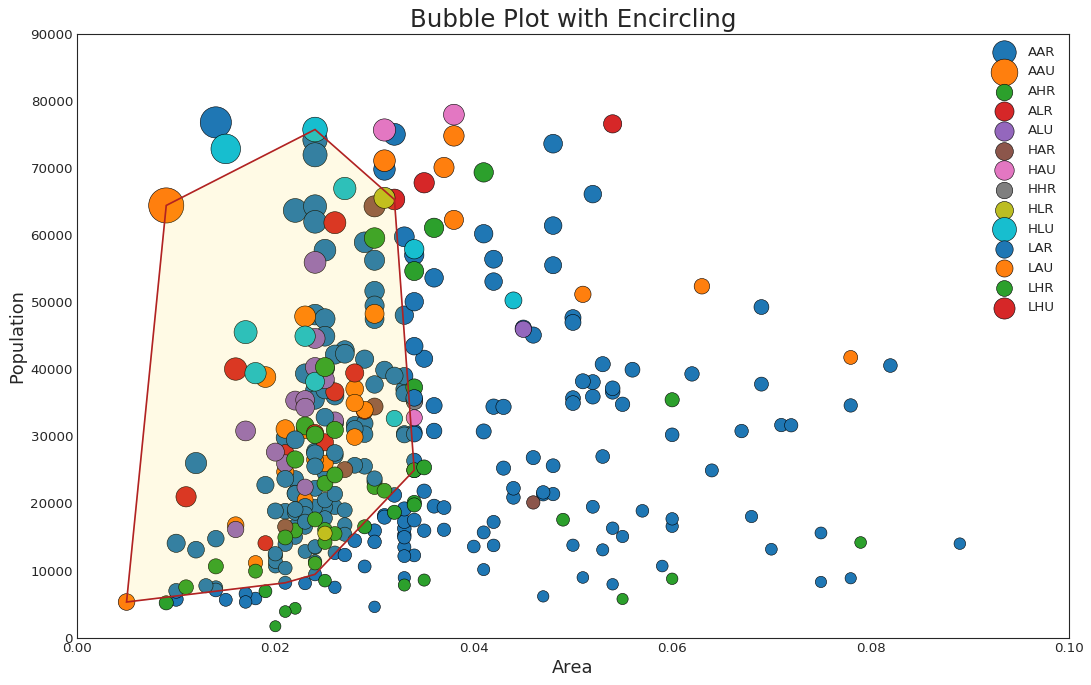

In [4]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')

sns.set_style("white")



# Step 1: Prepare Data
midwest = pd.read_csv("./mat50datas/midwest_filter.csv")



# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]



# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    



for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :],
                s='dot_size', cmap=colors[i], label=str(category), edgecolors='black', linewidths=.5)


# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

def encircle(x,y, ax=None, **kw):

    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)



# Select data to be encircled

midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         


# Draw polygon surrounding vertices    

encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)



# Step 4: Decorations

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')



plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

### 3. 带线性回归最佳拟合线的散点图 （Scatter plot with linear regression line of best fit）

如果你想了解两个变量如何相互改变，那么最佳拟合线就是常用的方法。 下图显示了数据中各组之间最佳拟合线的差异。 要禁用分组并仅为整个数据集绘制一条最佳拟合线，请从下面的 sns.lmplot（）调用中删除 hue ='cyl'参数。

In [8]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 9.5 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 4.0 MB/s eta 0:00:01


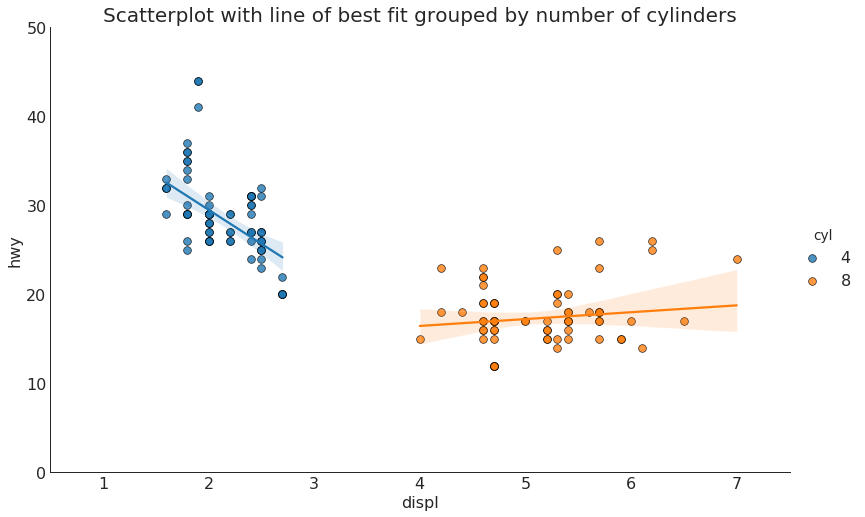

In [10]:
# Import Data
import statsmodels
df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select,
                     height=7, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

**针对每列绘制线性回归线：**

或者，可以在其每列中显示每个组的最佳拟合线。 可以通过在 sns.lmplot() 中设置 col=groupingcolumn 
参数来实现，如下：

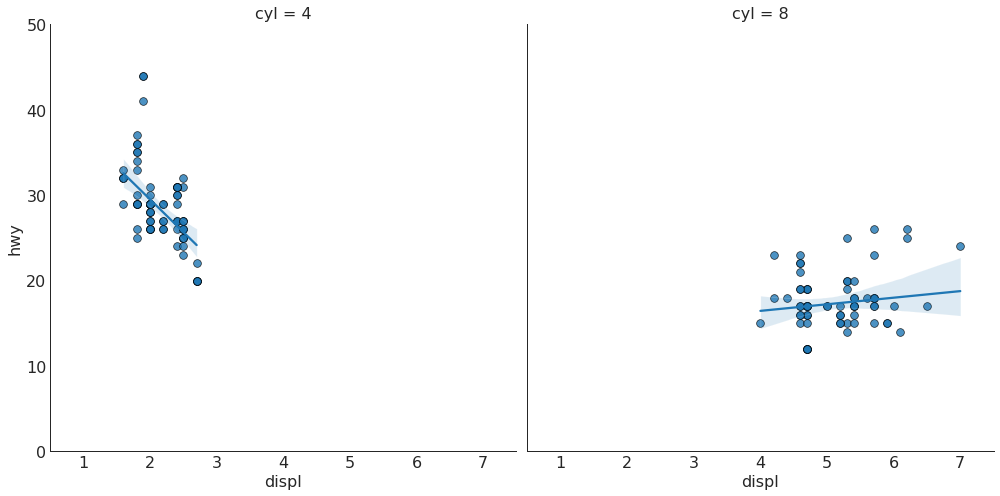

In [11]:
# Import Data
df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]


# Each line in its own column

sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy",
                     data=df_select,
                     height=7,
                     robust=True,
                     palette='Set1',
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

### 4. 抖动图 （Jittering with stripplot）

通常，多个数据点具有完全相同的 X 和 Y 值。 结果，多个点绘制会重叠并隐藏。 为避免这种情况，请将数据点稍微抖动，以便您可以直观地看到它们。 使用 seaborn 的 stripplot（） 很方便实现这个功能。

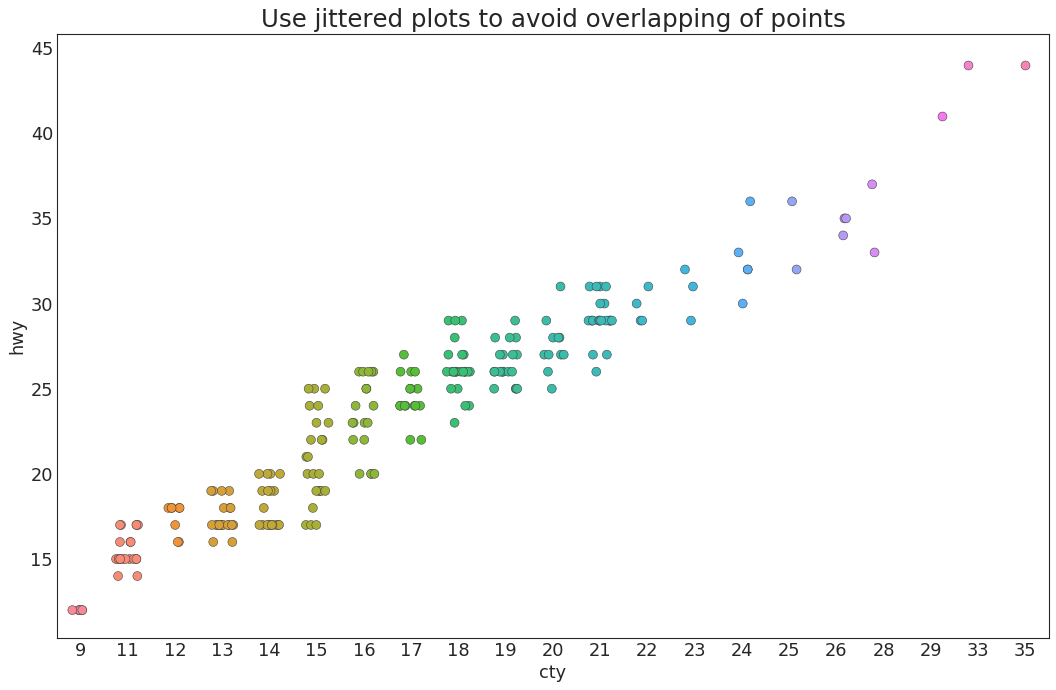

In [12]:
# Import Data

df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

### 5. 计数图 （Counts Plot）

避免点重叠问题的另一个选择是增加点的大小，这取决于该点中有多少点。 因此，点的大小越大，其周围的点的集中度越高。

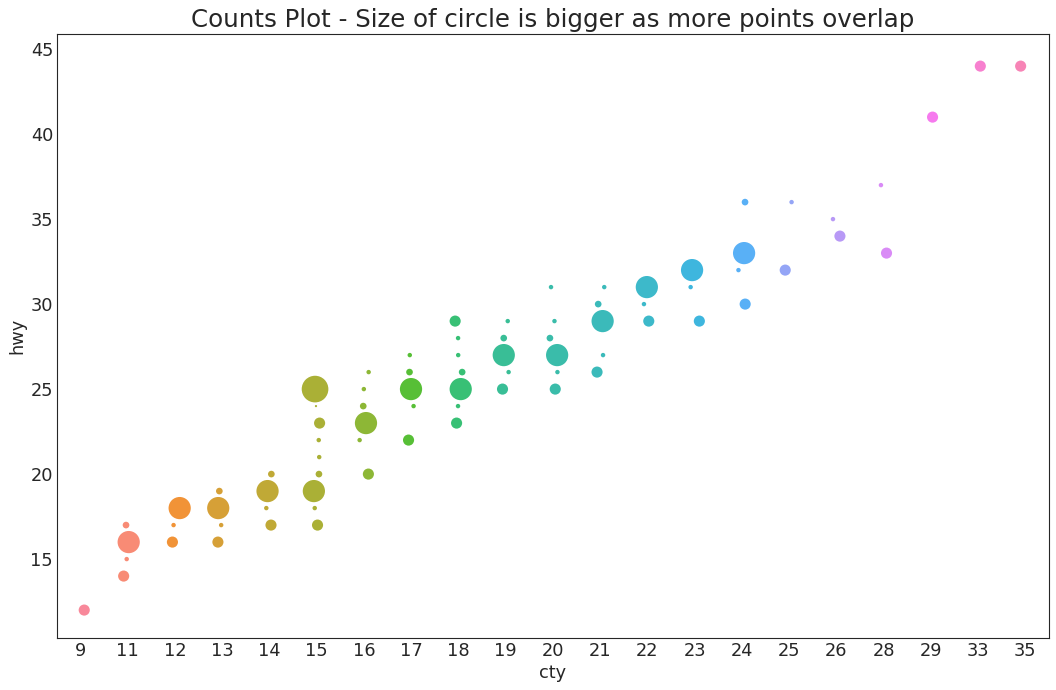

In [13]:
# Import Data

df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

### 6. 边缘直方图 （Marginal Histogram）

边缘直方图具有沿 X 和 Y 轴变量的直方图。 这用于可视化 X 和 Y 之间的关系以及单独的 X 和 Y 的单变量分布。 这种图经常用于探索性数据分析（EDA）。

![ooJwjX](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ooJwjX.jpg)

### 7. 边缘箱形图 （Marginal Boxplot）

边缘箱图与边缘直方图具有相似的用途。 然而，箱线图有助于精确定位 X 和 Y 的中位数、第25和第75百分位数。

![YIb5Io](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/YIb5Io.jpg)

### 8. 相关图 （Correllogram）

相关图用于直观地查看给定数据框（或二维数组）中所有可能的数值变量对之间的相关度量。

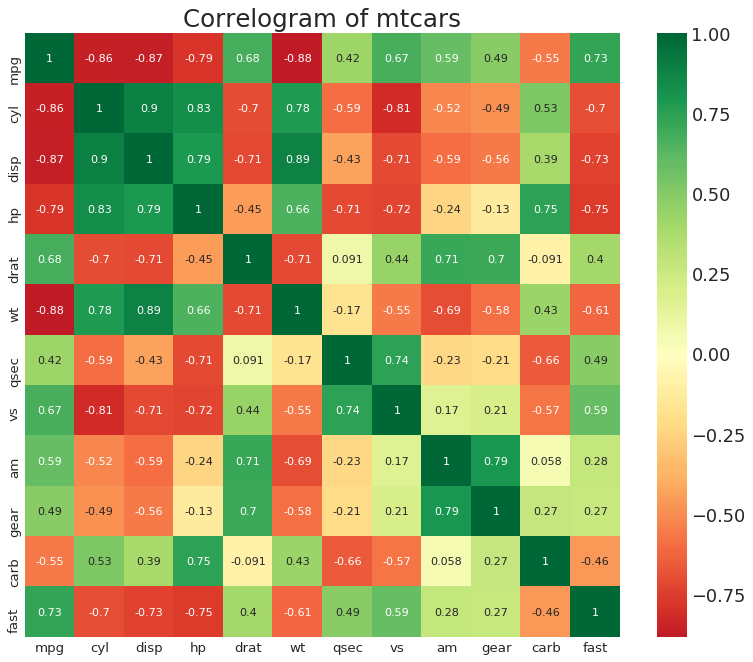

In [14]:
# Import Dataset
df = pd.read_csv("./mat50datas/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 9. 矩阵图 （Pairwise Plot）

矩阵图是探索性分析中的最爱，用于理解所有可能的数值变量对之间的关系。 它是双变量分析的必备工具。

<Figure size 800x640 with 0 Axes>

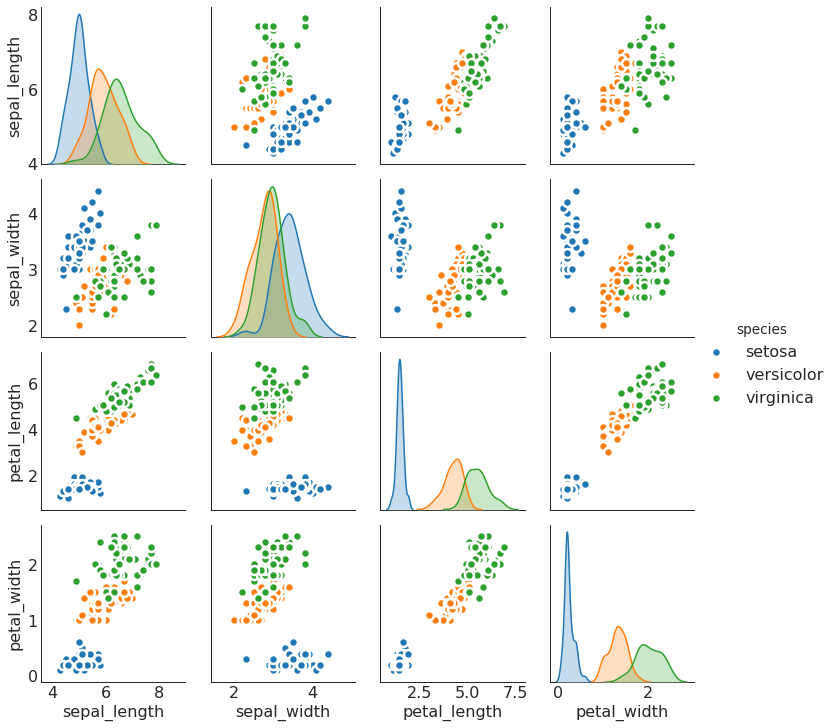

In [15]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

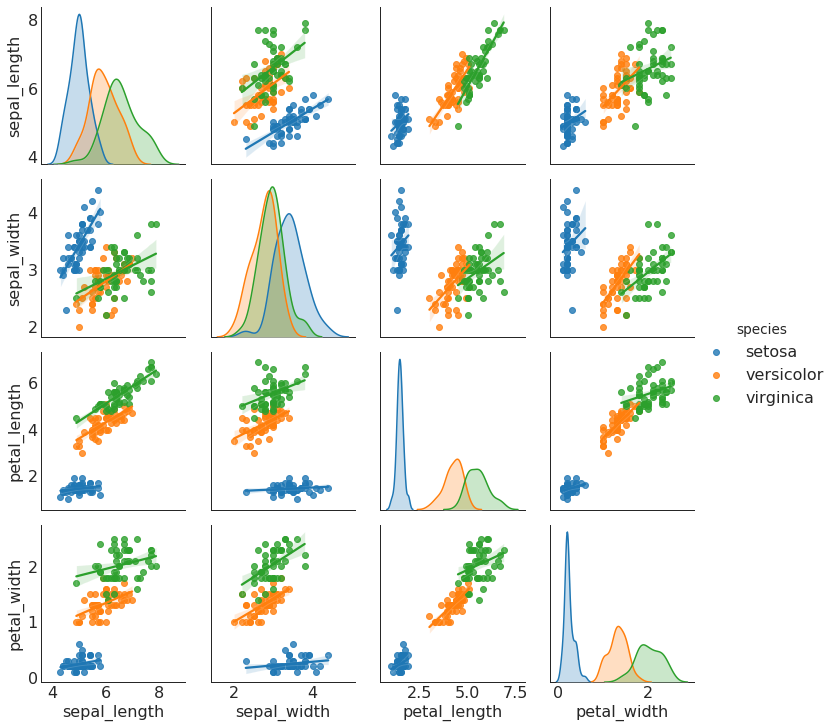

In [16]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

### **二、偏差 （Deviation）**

### 10. 发散型条形图 （Diverging Bars）

如果您想根据单个指标查看项目的变化情况，并可视化此差异的顺序和数量，那么散型条形图 （Diverging Bars） 是一个很好的工具。 它有助于快速区分数据中组的性能，并且非常直观，并且可以立即传达这一点。

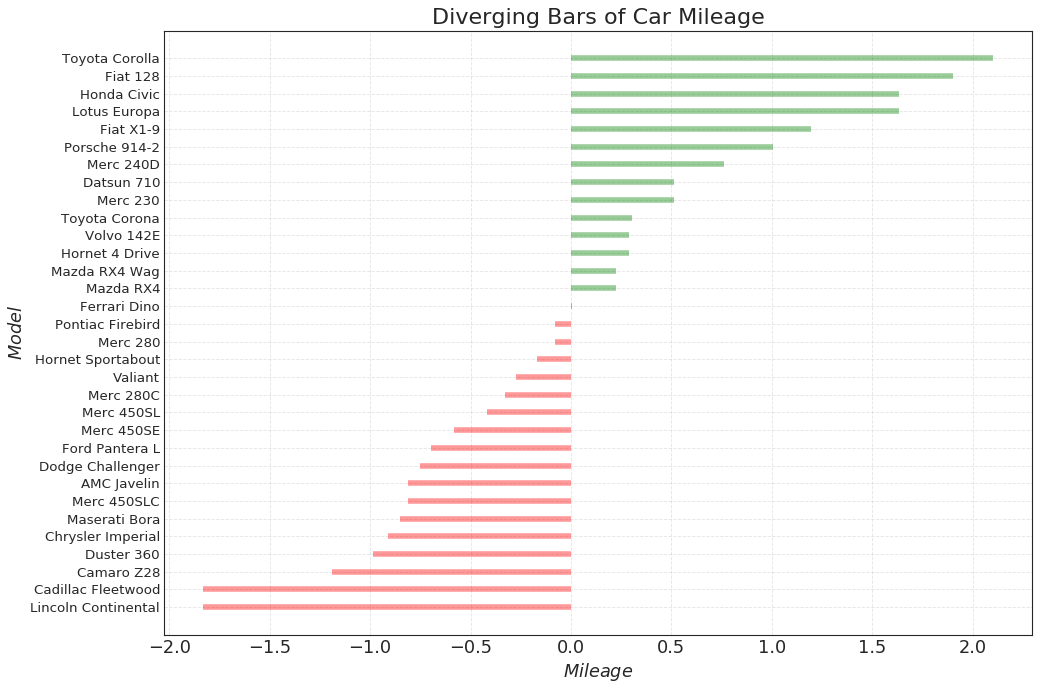

In [17]:
# Prepare Data
df = pd.read_csv("./mat50datas/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### 11. 发散型文本 （Diverging Texts）

发散型文本 （Diverging Texts）与发散型条形图 （Diverging Bars）相似，如果你想以一种漂亮和可呈现的方式显示图表中每个项目的价值，就可以使用这种方法。

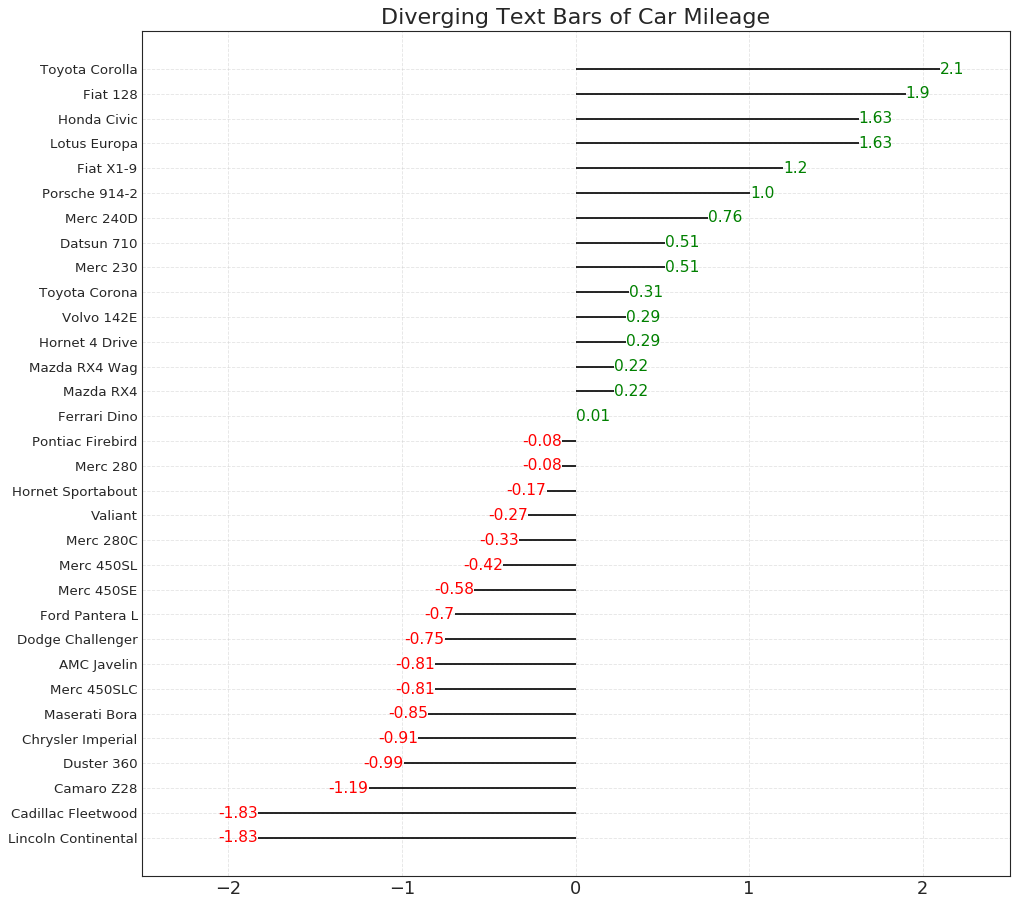

In [18]:
# Prepare Data
df = pd.read_csv("./mat50datas/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)


# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### 12. 发散型包点图 （Diverging Dot Plot）

发散型包点图 （Diverging Dot Plot）也类似于发散型条形图 （Diverging Bars）。 然而，与发散型条形图 （Diverging Bars）相比，条的缺失减少了组之间的对比度和差异。

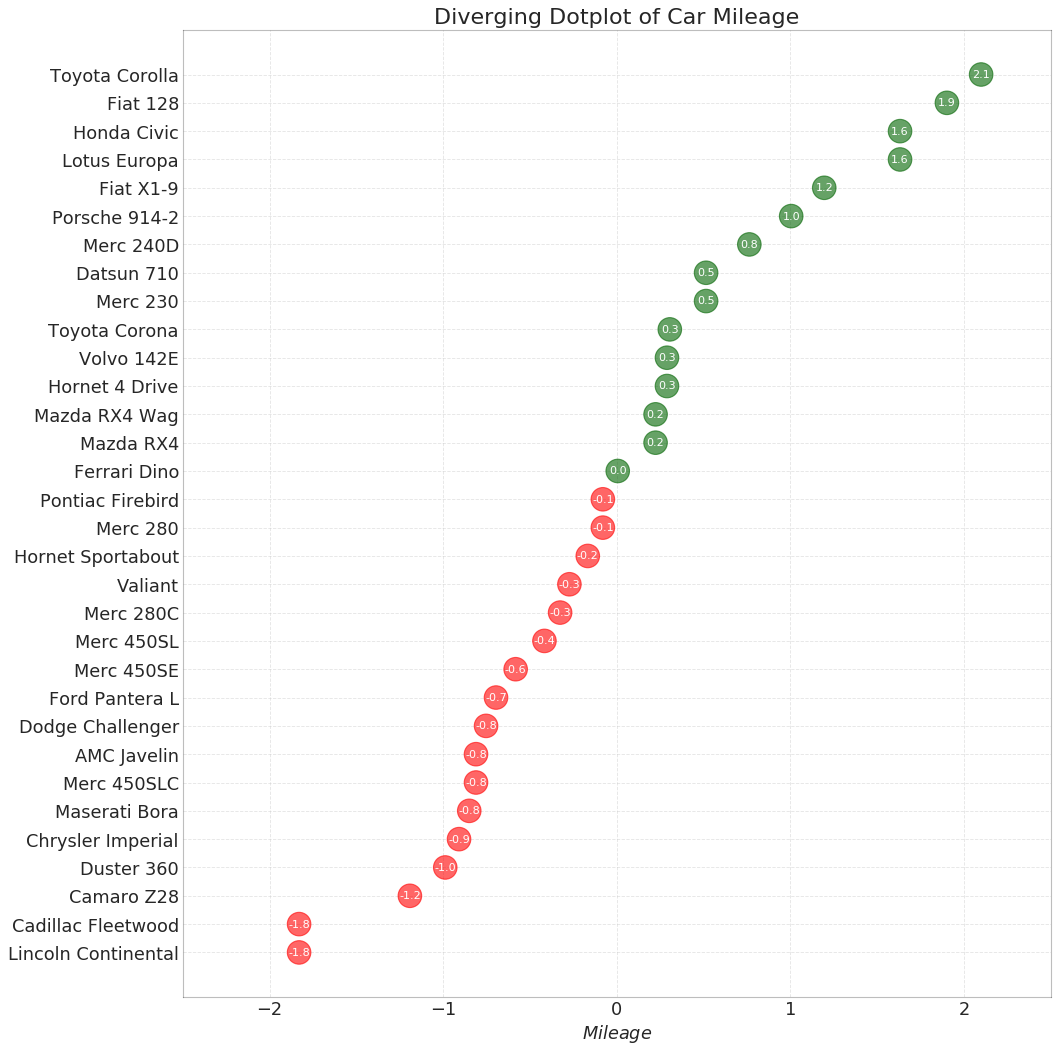

In [19]:
# Prepare Data
df = pd.read_csv("./mat50datas/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'white'})



# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)


plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### 13. 带标记的发散型棒棒糖图 （Diverging Lollipop Chart with Markers）

带标记的棒棒糖图通过强调您想要引起注意的任何重要数据点并在图表中适当地给出推理，提供了一种对差异进行可视化的灵活方式。

![JGKLV8](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/JGKLV8.jpg)

### 14. 面积图 （Area Chart）

通过对轴和线之间的区域进行着色，面积图不仅强调峰和谷，而且还强调高点和低点的持续时间。 高点持续时间越长，线下面积越大。

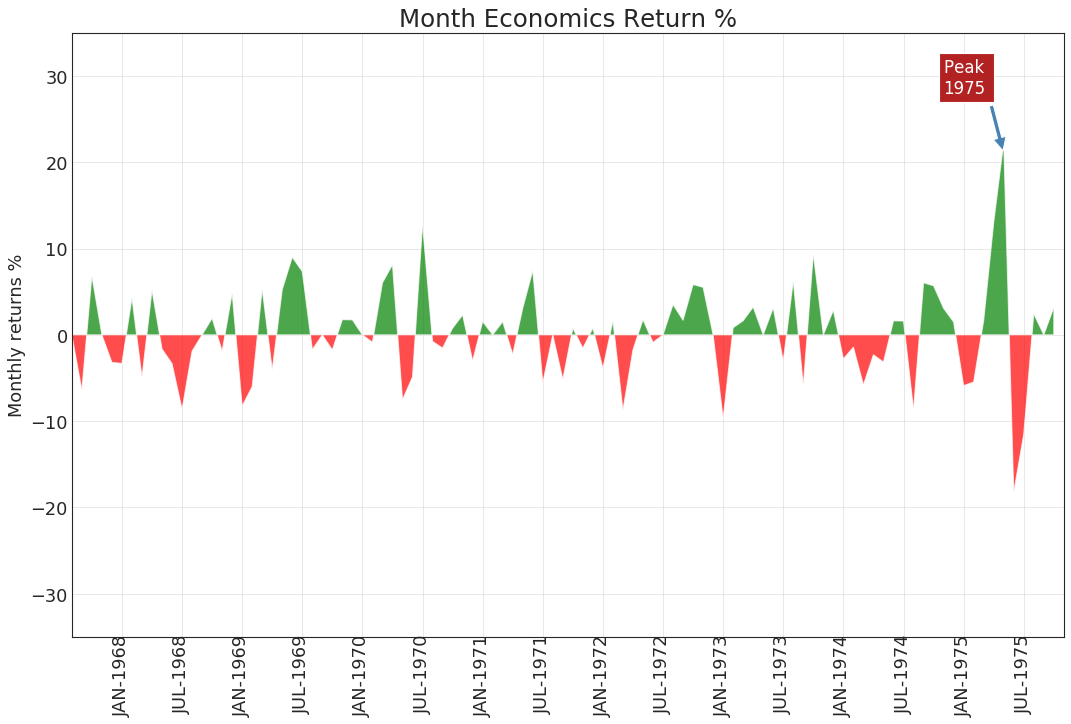

In [20]:
import numpy as np
import pandas as pd

# Prepare Data
df = pd.read_csv("./mat50datas/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100


# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)


# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

## **三、排序 （Ranking）**

### 15. 有序条形图 （Ordered Bar Chart）

有序条形图有效地传达了项目的排名顺序。 但是，在图表上方添加度量标准的值，用户可以从图表本身获取精确信息。

![p1ahCQ](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/p1ahCQ.jpg)

### 16. 棒棒糖图 （Lollipop Chart）

棒棒糖图表以一种视觉上令人愉悦的方式提供与有序条形图类似的目的。

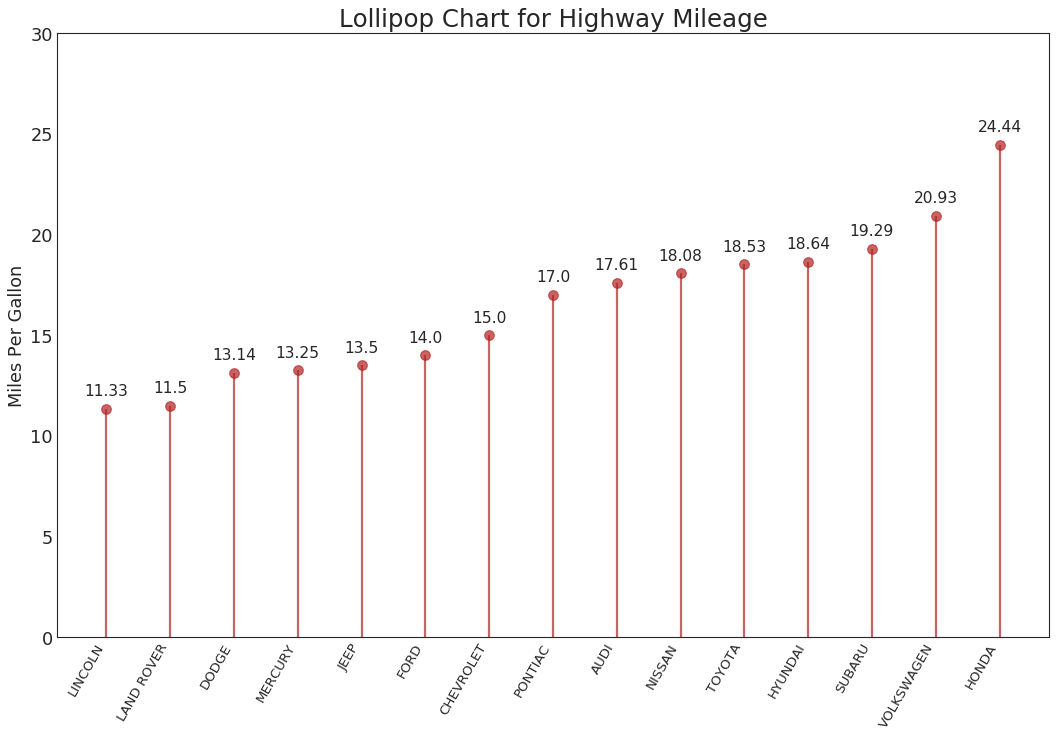

In [21]:
# Prepare Data
df_raw = pd.read_csv("./mat50datas/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)



# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)


# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

### 17. 包点图 （Dot Plot）

包点图表传达了项目的排名顺序，并且由于它沿水平轴对齐，因此您可以更容易地看到点彼此之间的距离。

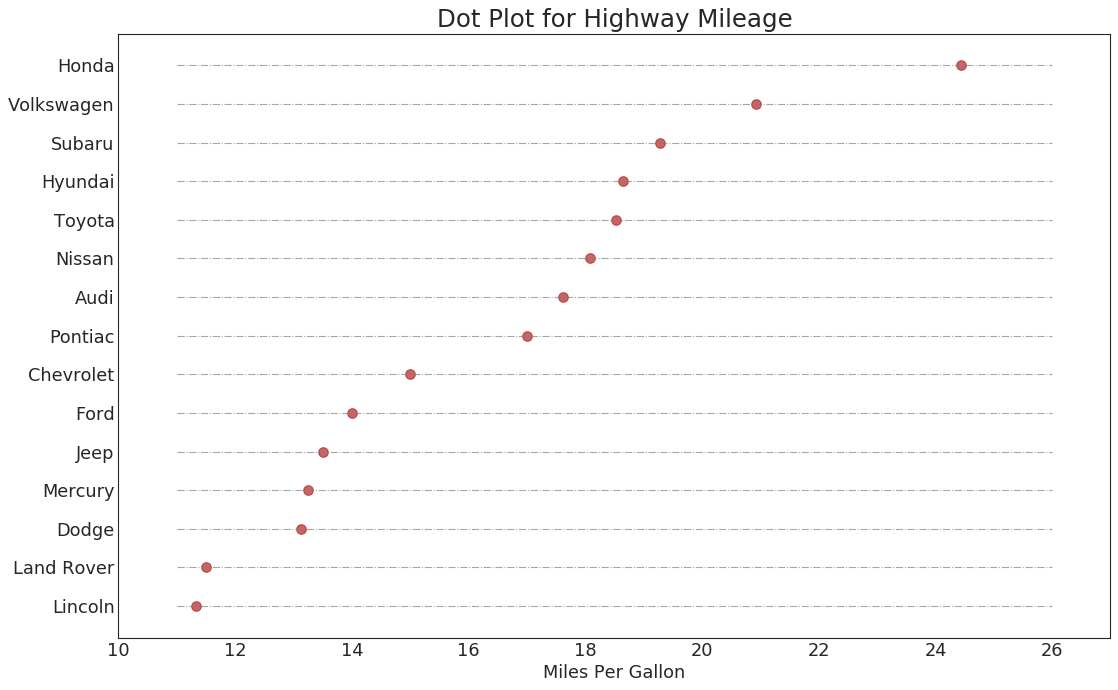

In [22]:
# Prepare Data
df_raw = pd.read_csv("./mat50datas/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)


# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

### 18. 坡度图 （Slope Chart）

坡度图最适合比较给定人/项目的“前”和“后”位置。

![sqs6T9](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/sqs6T9.jpg)

### 19. 哑铃图 （Dumbbell Plot）

哑铃图表传达了各种项目的“前”和“后”位置以及项目的等级排序。 如果您想要将特定项目/计划对不同对象的影响可视化，那么它非常有用。

![0r5aAZ](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/0r5aAZ.jpg)

## **四、分布 （Distribution）**

### 20. 连续变量的直方图 （Histogram for Continuous Variable）

直方图显示给定变量的频率分布。下面的图表示基于类型变量对频率条进行分组，从而更好地了解连续变量和类型变量。

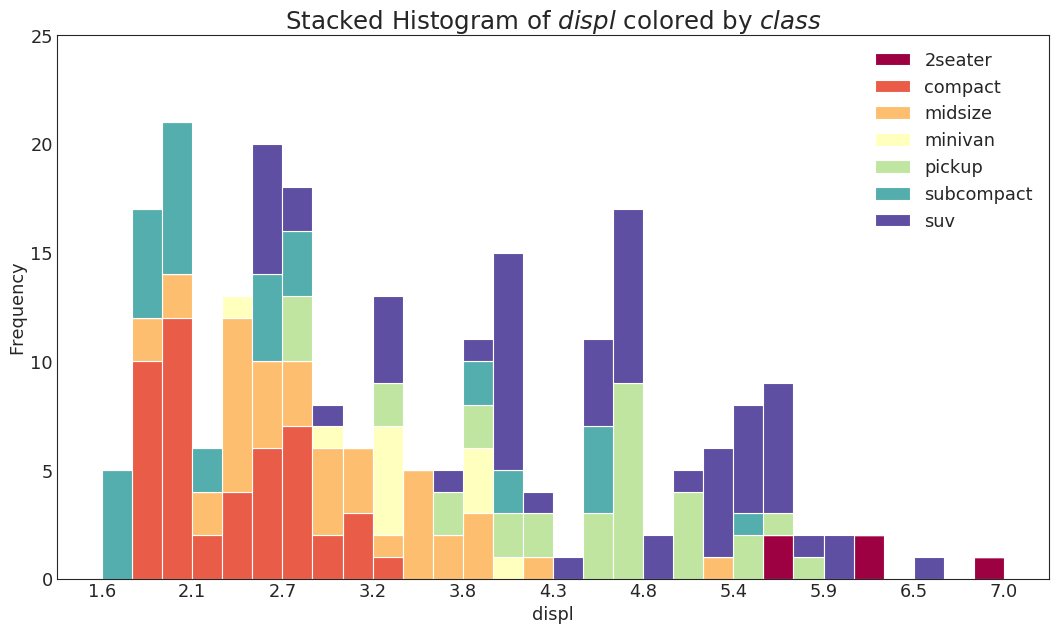

In [23]:
# Import Data
df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])


# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

### 21. 类型变量的直方图 （Histogram for Categorical Variable）

类型变量的直方图显示该变量的频率分布。 通过对条形图进行着色，可以将分布与表示颜色的另一个类型变量相关联。

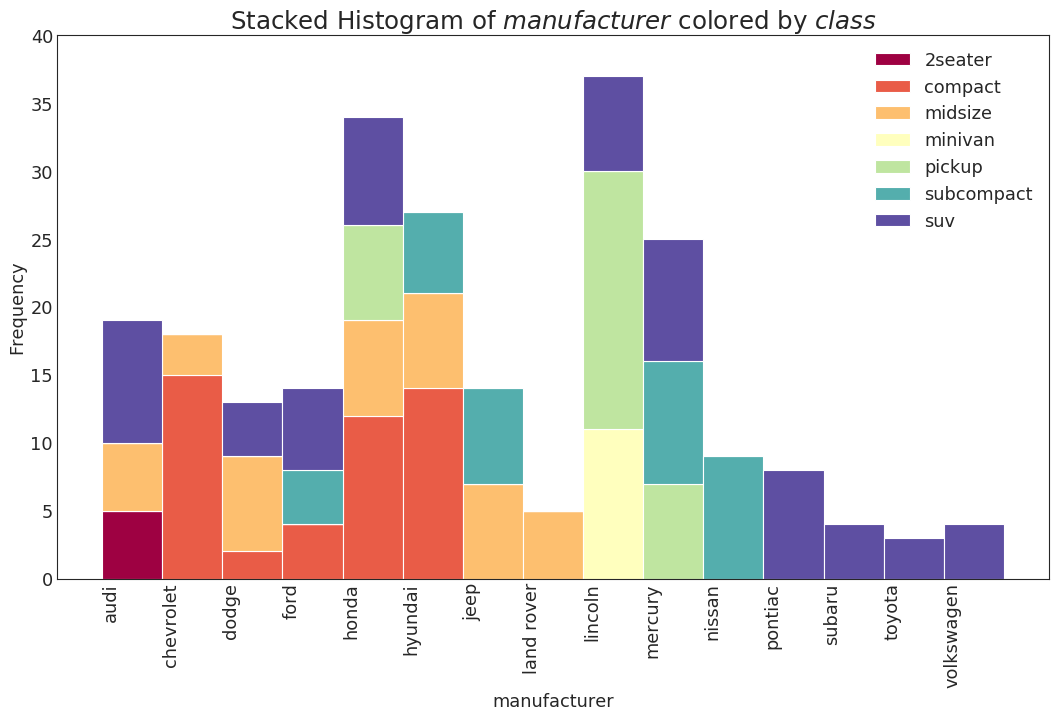

In [24]:
# Import Data
df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])


# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

### 22. 密度图 （Density Plot）

密度图是一种常用工具，用于可视化连续变量的分布。 通过“响应”变量对它们进行分组，您可以检查 X 和 Y 之间的关系。以下情况用于表示目的，以描述城市里程的分布如何随着汽缸数的变化而变化。

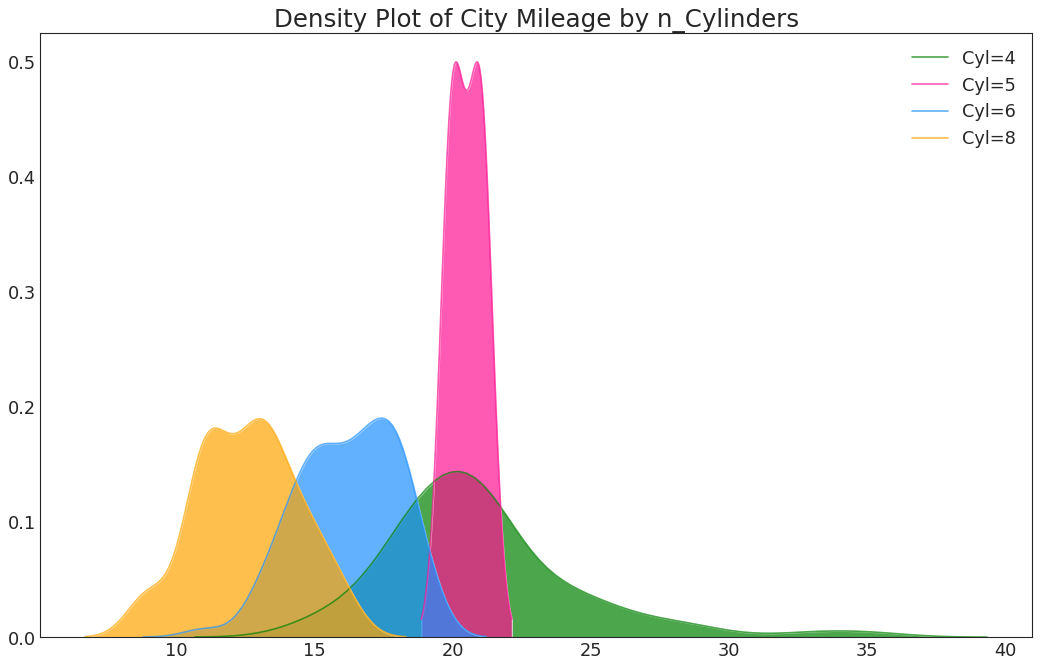

In [25]:
# Import Data
df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

### 23. 直方密度线图 （Density Curves with Histogram）

带有直方图的密度曲线汇集了两个图所传达的集体信息，因此您可以将它们放在一个图中而不是两个图中。

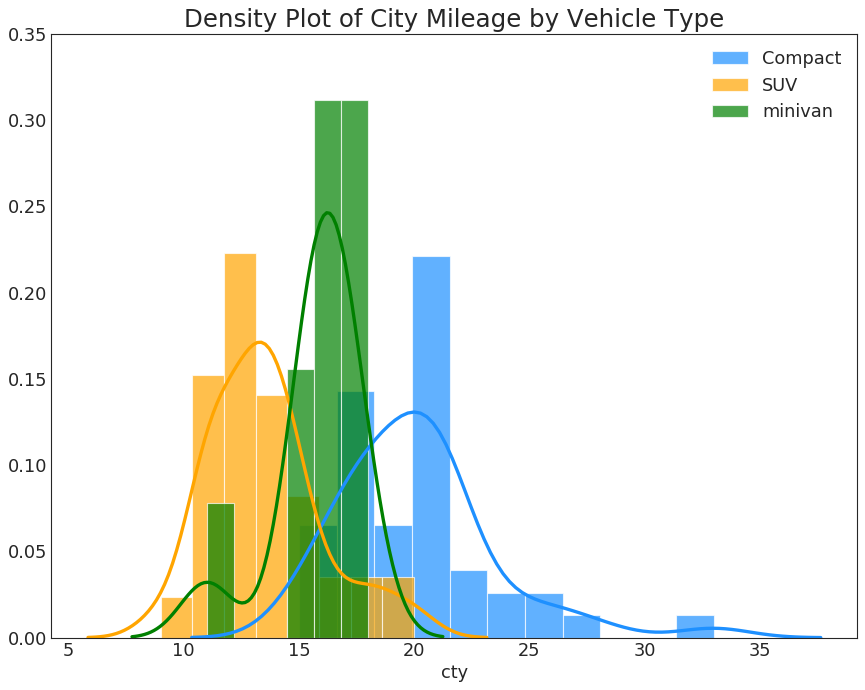

In [26]:
# Import Data
df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)


# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

### 24. Joy Plot

Joy Plot允许不同组的密度曲线重叠，这是一种可视化大量分组数据的彼此关系分布的好方法。 它看起来很悦目，并清楚地传达了正确的信息。 它可以使用基于 matplotlib 的 joypy 包轻松构建。 

**注：**需要安装 joypy 库

In [27]:
!pip install joypy

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple


<Figure size 1280x800 with 0 Axes>

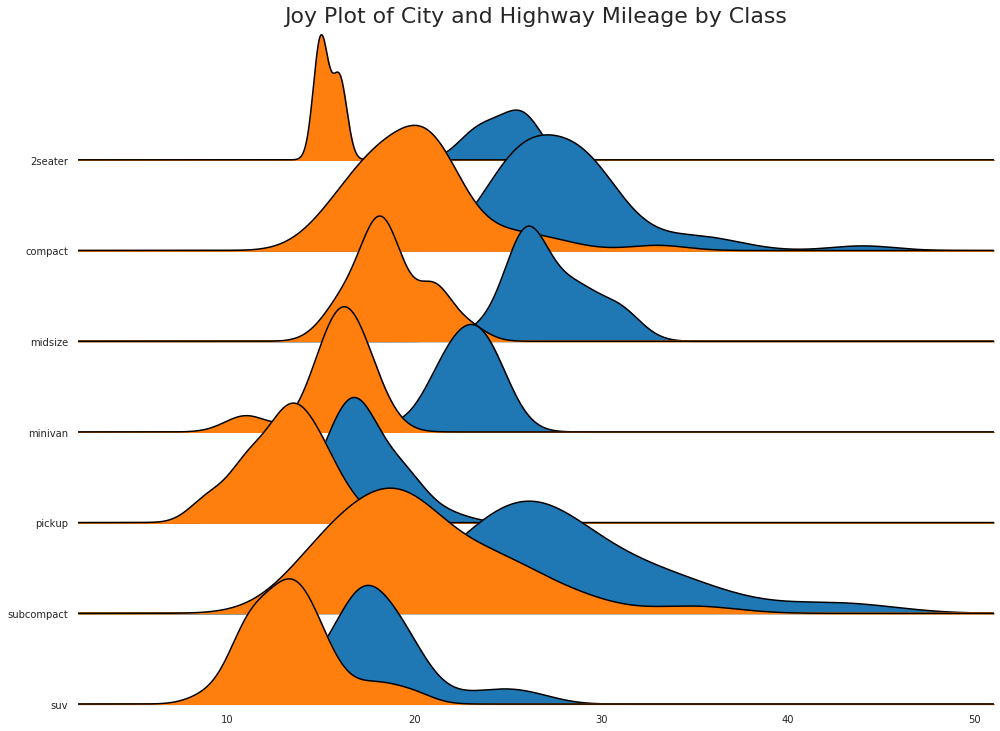

In [28]:
import joypy

# Import Data
mpg = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

### 25. 分布式包点图 （Distributed Dot Plot）

分布式包点图显示按组分割的点的单变量分布。 点数越暗，该区域的数据点集中度越高。 通过对中位数进行不同着色，组的真实定位立即变得明显。

![7Hfuh1](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/7Hfuh1.jpg)

### 26. 箱形图 （Box Plot）

箱形图是一种可视化分布的好方法，记住中位数、第25个第45个四分位数和异常值。 但是，您需要注意解释可能会扭曲该组中包含的点数的框的大小。 因此，手动提供每个框中的观察数量可以帮助克服这个缺点。

例如，左边的前两个框具有相同大小的框，即使它们的值分别是5和47。 因此，写入该组中的观察数量是必要的。

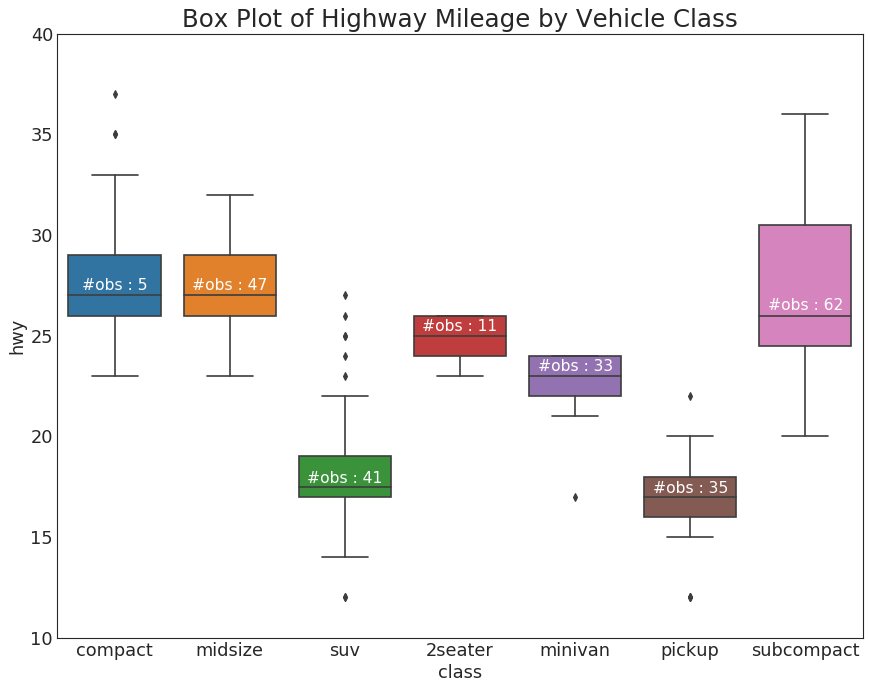

In [29]:
# Import Data
df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)


# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')


add_n_obs(df,group_col='class',y='hwy')    

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

### 27. 包点+箱形图 （Dot + Box Plot）

包点+箱形图 （Dot + Box Plot）传达类似于分组的箱形图信息。 此外，这些点可以了解每组中有多少数据点。

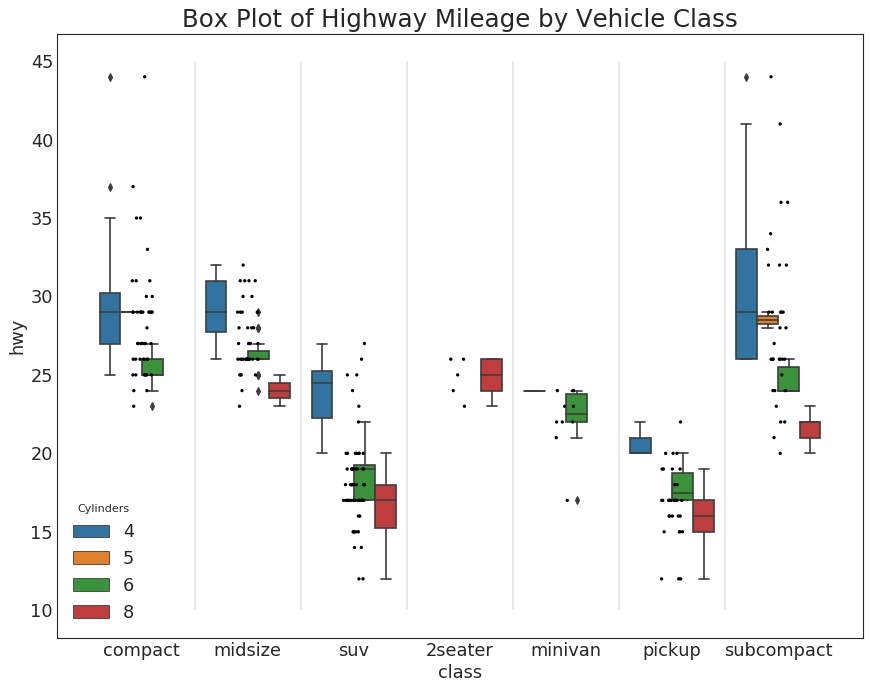

In [30]:
# Import Data
df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

### 28. 小提琴图 （Violin Plot）

小提琴图是箱形图在视觉上令人愉悦的替代品。 小提琴的形状或面积取决于它所持有的观察次数。 但是，小提琴图可能更难以阅读，并且在专业设置中不常用。

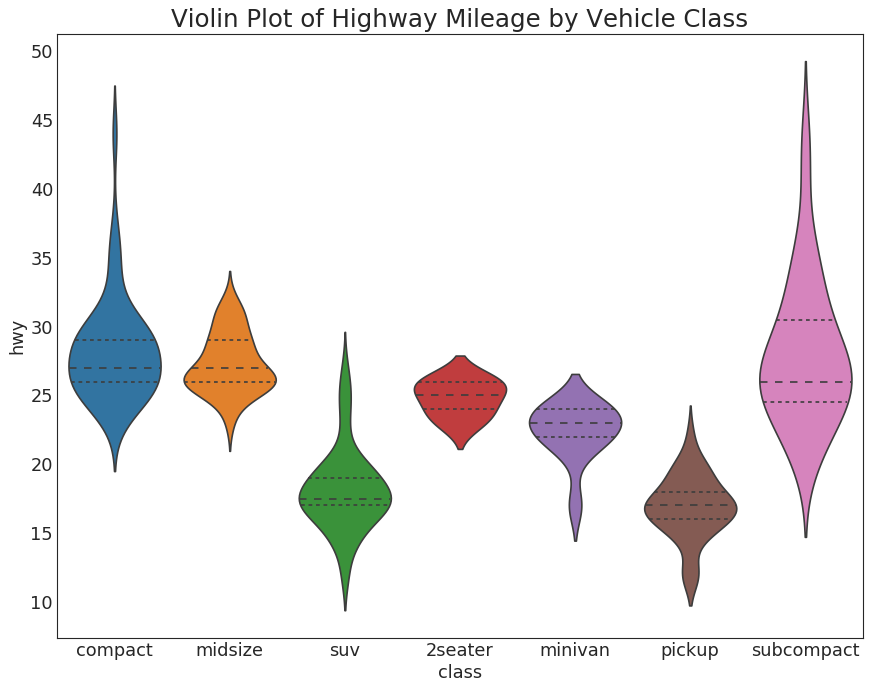

In [31]:
# Import Data
df = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

### 29. 人口金字塔 （Population Pyramid）

人口金字塔可用于显示由数量排序的组的分布。 或者它也可以用于显示人口的逐级过滤，因为它在下面用于显示有多少人通过营销渠道的每个阶段。

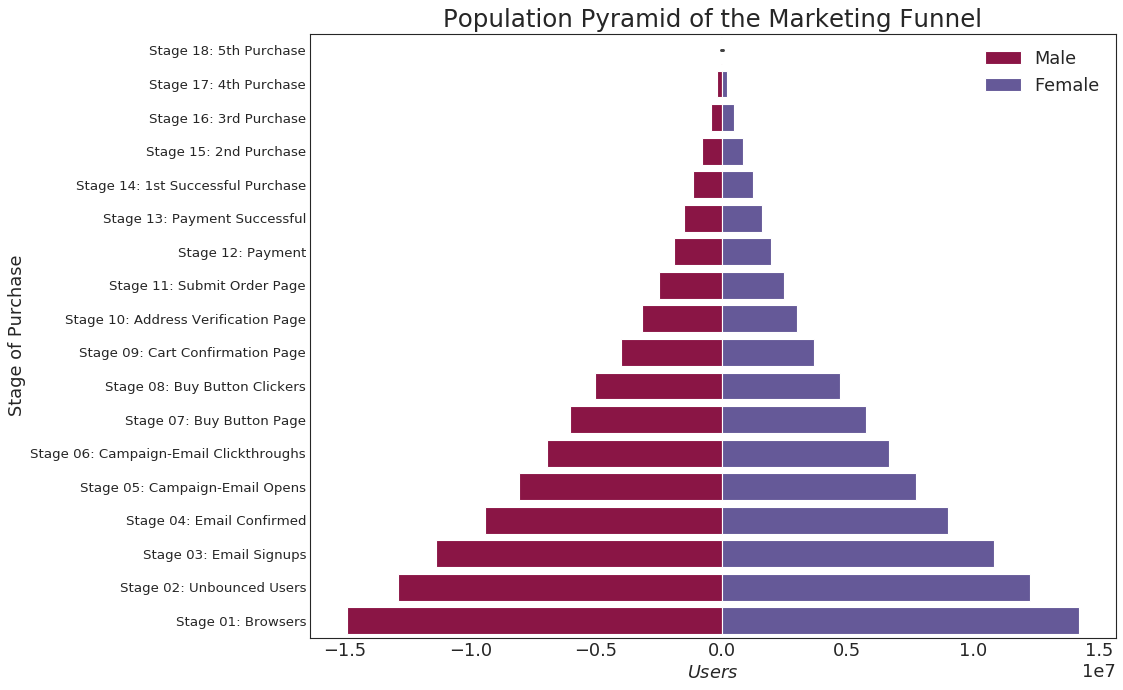

In [32]:
# Read data
df = pd.read_csv("./mat50datas/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

### 30. 分类图 （Categorical Plots）

由 seaborn库 提供的分类图可用于可视化彼此相关的2个或更多分类变量的计数分布。

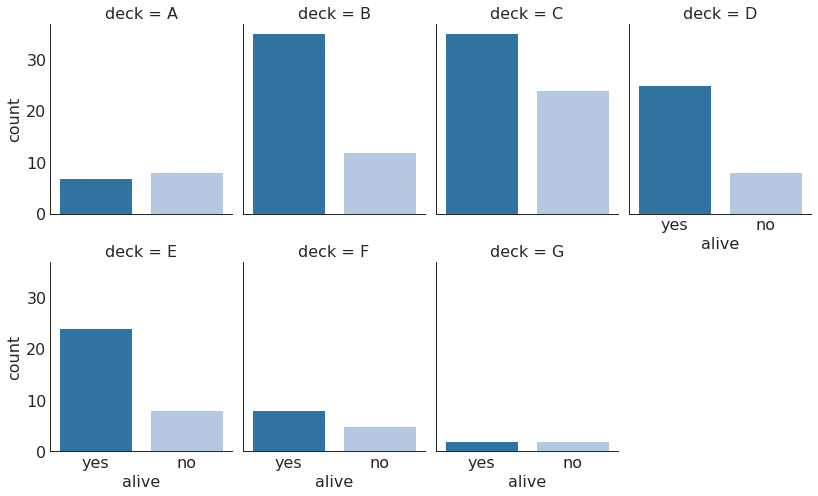

In [33]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
g = sns.catplot("alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=3.5, aspect=.8,
                palette='tab20')

fig.suptitle('sf')
plt.show()

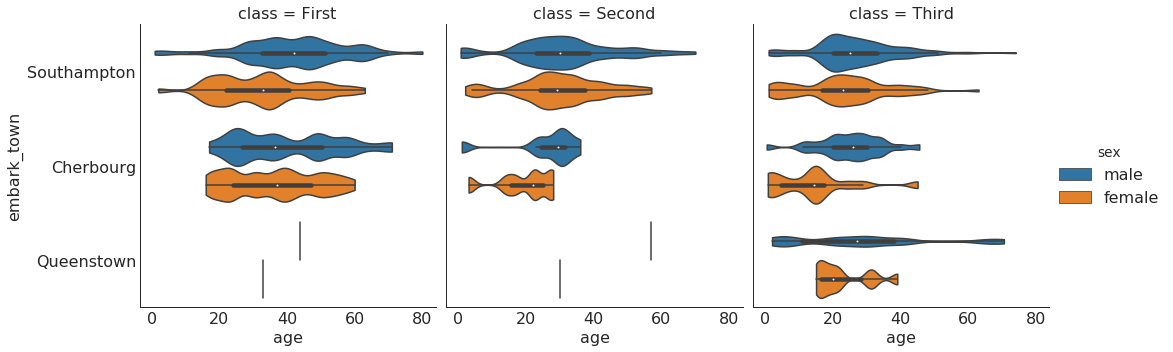

In [34]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)

## **五、组成 （Composition）**

### 31. 华夫饼图 （Waffle Chart）

可以使用 pywaffle包 创建华夫饼图，并用于显示更大群体中的组的组成。

**注：**需要安装 pywaffle 库

In [35]:
! pip install pywaffle

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 526 kB 3.5 MB/s eta 0:00:01


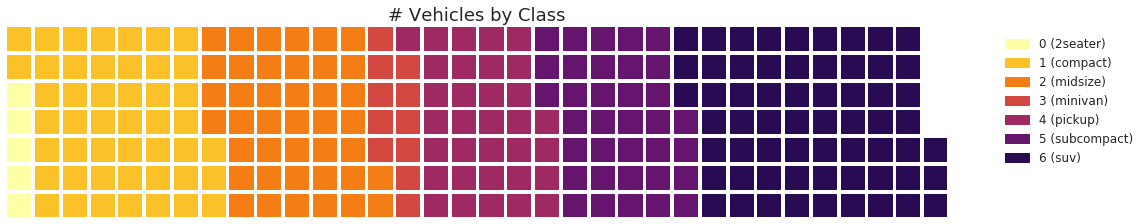

In [36]:
#! pip install pywaffle

# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart

from pywaffle import Waffle

# Import
df_raw = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)

)

### 32. 饼图 （Pie Chart）

饼图是显示组成的经典方式。 然而，现在通常不建议使用它，因为馅饼部分的面积有时会变得误导。 因此，如果您要使用饼图，强烈建议明确记下饼图每个部分的百分比或数字。

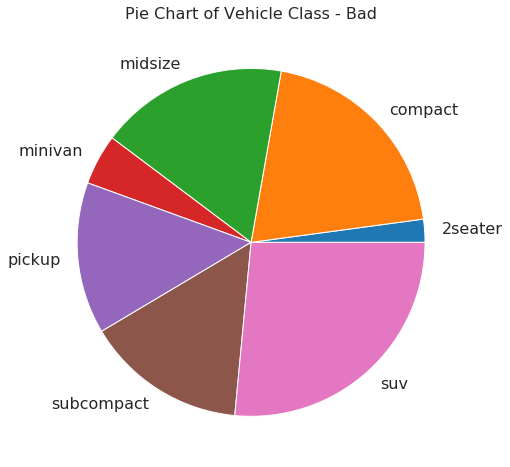

In [37]:
# Import
df_raw = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

### 33. 树形图 （Treemap）

树形图类似于饼图，它可以更好地完成工作而不会误导每个组的贡献。

**注：**需要安装 squarify 库

In [38]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple


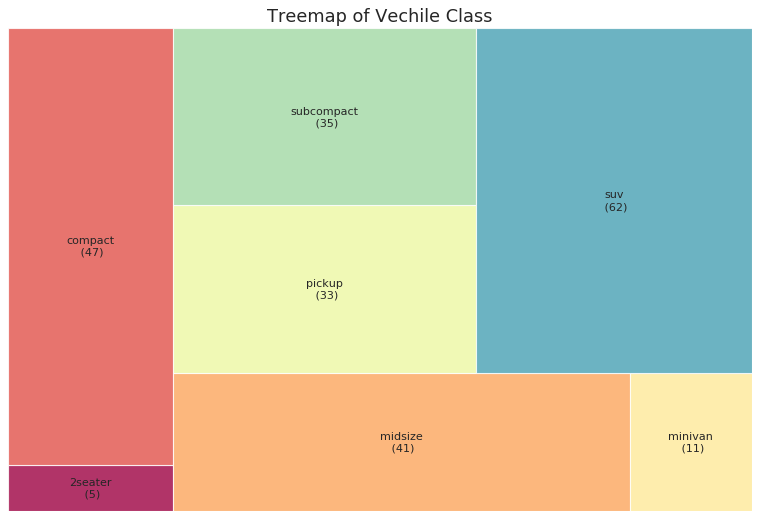

In [39]:
# pip install squarify
import squarify

# Import Data
df_raw = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

### 34. 条形图 （Bar Chart）

条形图是基于计数或任何给定指标可视化项目的经典方式。 在下面的图表中，我为每个项目使用了不同的颜色，但您通常可能希望为所有项目选择一种颜色，除非您按组对其进行着色。 颜色名称存储在下面代码中的all_colors中。 您可以通过在 plt.plot（）中设置颜色参数来更改条的颜色。

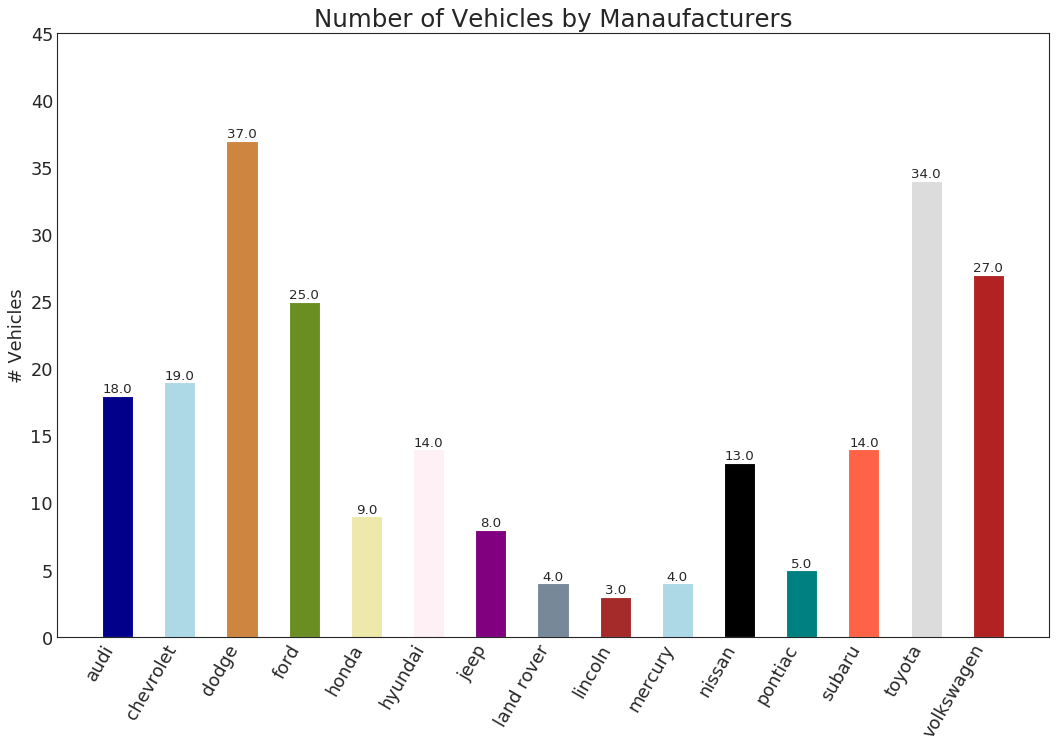

In [40]:
import random

# Import Data
df_raw = pd.read_csv("./mat50datas/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)


# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})


# Decoration
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

### 六、变化 （Change）

### 35. 时间序列图 （Time Series Plot）

时间序列图用于显示给定度量随时间变化的方式。 在这里，您可以看到 1949年 至 1969年间航空客运量的变化情况。

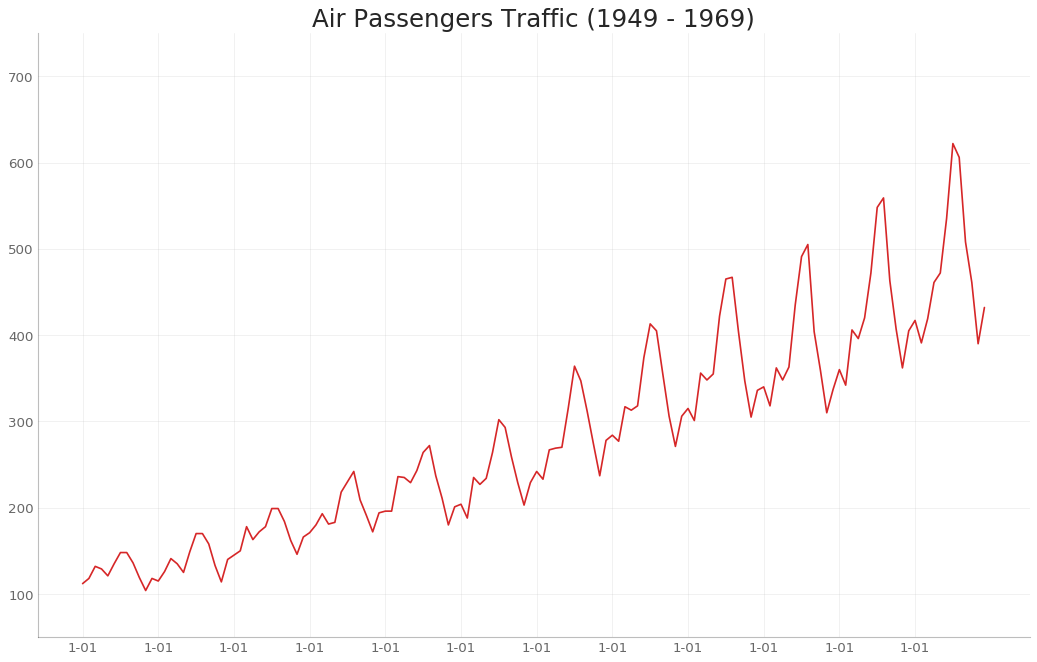

In [43]:
# Import Data

df = pd.read_csv('./mat50datas/AirPassengers.csv')



# Draw Plot

plt.figure(figsize=(16,10), dpi= 80)

plt.plot('date', 'value', data=df, color='tab:red')



# Decoration

plt.ylim(50, 750)

xtick_location = df.index.tolist()[::12]

xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]

plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)

plt.yticks(fontsize=12, alpha=.7)

plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)

plt.grid(axis='both', alpha=.3)



# Remove borders

plt.gca().spines["top"].set_alpha(0.0)    

plt.gca().spines["bottom"].set_alpha(0.3)

plt.gca().spines["right"].set_alpha(0.0)    

plt.gca().spines["left"].set_alpha(0.3)   

plt.show()

### 36. 带波峰波谷标记的时序图 （Time Series with Peaks and Troughs Annotated）

下面的时间序列绘制了所有峰值和低谷，并注释了所选特殊事件的发生。

![ycCGqK](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ycCGqK.jpg)

### 37. 自相关和部分自相关图 （Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plot）

自相关图（ACF图）显示时间序列与其自身滞后的相关性。 每条垂直线（在自相关图上）表示系列与滞后0之间的滞后之间的相关性。图中的蓝色阴影区域是显着性水平。 那些位于蓝线之上的滞后是显着的滞后。

那么如何解读呢？

对于空乘旅客，我们看到多达14个滞后跨越蓝线，因此非常重要。 这意味着，14年前的航空旅客交通量对今天的交通状况有影响。

PACF在另一方面显示了任何给定滞后（时间序列）与当前序列的自相关，但是删除了滞后的贡献。

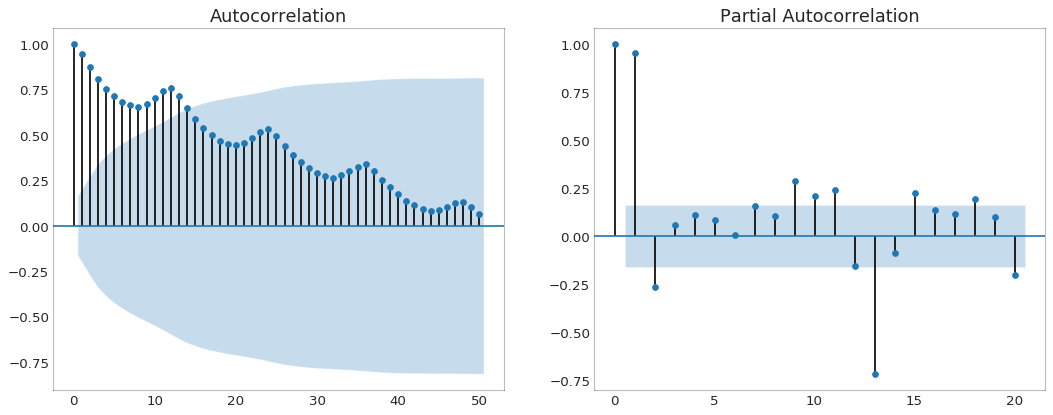

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import Data
df = pd.read_csv('./mat50datas/AirPassengers.csv')

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df.value.tolist(), ax=ax1, lags=50)
plot_pacf(df.value.tolist(), ax=ax2, lags=20)


# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)


# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

### 38. 交叉相关图 （Cross Correlation plot）

交叉相关图显示了两个时间序列相互之间的滞后。

![q3CvhC](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/q3CvhC.jpg)

### 39. 时间序列分解图 （Time Series Decomposition Plot）

时间序列分解图显示时间序列分解为趋势，季节和残差分量。

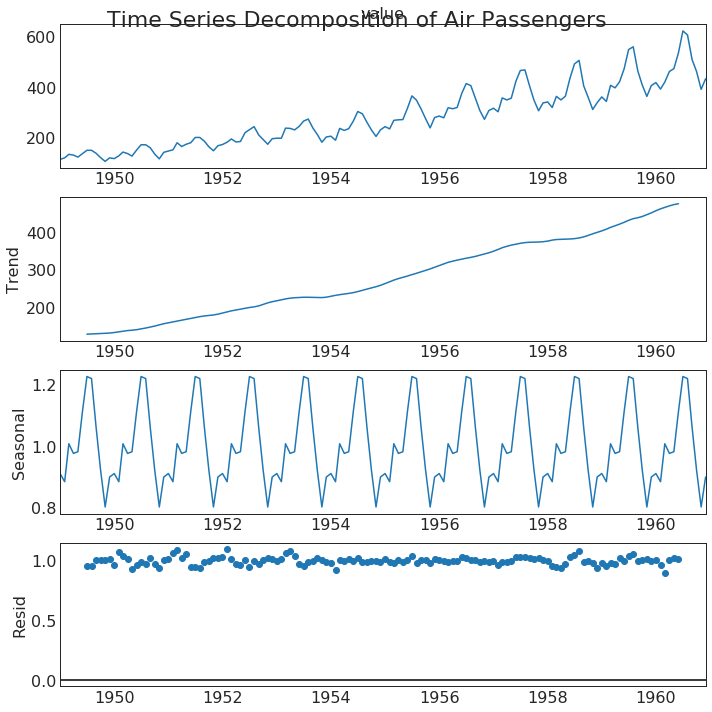

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Import Data
df = pd.read_csv('./mat50datas/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)


# Decompose
result = seasonal_decompose(df['value'], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.show()

### 40. 多个时间序列 （Multiple Time Series）

您可以绘制多个时间序列，在同一图表上测量相同的值，如下所示。

![2qQ1GK](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/2qQ1GK.jpg)

### 41. 使用辅助 Y 轴来绘制不同范围的图形 （Plotting with different scales using secondary Y axis）

如果要显示在同一时间点测量两个不同数量的两个时间序列，则可以在右侧的辅助Y轴上再绘制第二个系列。

![DBbgeR](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/DBbgeR.jpg)

### 42. 带有误差带的时间序列 （Time Series with Error Bands）

如果您有一个时间序列数据集，每个时间点（日期/时间戳）有多个观测值，则可以构建带有误差带的时间序列。 您可以在下面看到一些基于每天不同时间订单的示例。 另一个关于45天持续到达的订单数量的例子。

在该方法中，订单数量的平均值由白线表示。 并且计算95％置信区间并围绕均值绘制。

![J93FJt](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/J93FJt.jpg)

![e8VbIk](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/e8VbIk.jpg)

### 43. 堆积面积图 （Stacked Area Chart）

堆积面积图可以直观地显示多个时间序列的贡献程度，因此很容易相互比较。

![EkQHy9](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/EkQHy9.jpg)

### 44. 未堆积的面积图 （Area Chart UnStacked）

未堆积面积图用于可视化两个或更多个系列相对于彼此的进度（起伏）。 在下面的图表中，您可以清楚地看到随着失业中位数持续时间的增加，个人储蓄率会下降。 未堆积面积图表很好地展示了这种现象。

In [ ]:
# Import Data
df = pd.read_csv("./mat50datas/economics.csv")

# Prepare Data
x = df['date'].values.tolist()
y1 = df['psavert'].values.tolist()
y2 = df['uempmed'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['psavert', 'uempmed']


# Draw Plot
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)


# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])



# Draw Tick lines  
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)



# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

### 45. 日历热力图 （Calendar Heat Map）

与时间序列相比，日历地图是可视化基于时间的数据的备选和不太优选的选项。 虽然可以在视觉上吸引人，但数值并不十分明显。 然而，它可以很好地描绘极端值和假日效果。

**注：**需要安装 calmap 库

<pre>
1.  `import matplotlib as mpl`

2.  

3.  `# pip install calmap  `

4.  `# Python数据之道 备注`

5.  `import calmap`

6.  

7.  `# Import Data`

8.  `df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv", parse_dates=['date'])`

9.  `df.set_index('date', inplace=True)`

10.  

11.  `# Plot`

12.  `plt.figure(figsize=(16,10), dpi= 80)`

13.  `calmap.calendarplot(df['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})`

14.  `plt.show()`

</pre>

![](https://image.jiqizhixin.com/uploads/editor/c6ba00c3-20c3-46d4-838b-80c0313bf75e/640.png)

### 46. 季节图 （Seasonal Plot）

季节图可用于比较上一季中同一天（年/月/周等）的时间序列。

![](https://image.jiqizhixin.com/uploads/editor/c06d44d4-0699-4dfc-ac0e-59f8d82bb87c/640.png)

## **七、分组 （Groups）**

### 47. 树状图 （Dendrogram）

树形图基于给定的距离度量将相似的点组合在一起，并基于点的相似性将它们组织在树状链接中。

<pre>
1.  `import scipy.cluster.hierarchy as shc`

2.  

3.  `# Import Data`

4.  `df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')`

5.  

6.  `# Plot`

7.  `plt.figure(figsize=(16, 10), dpi= 80)  `

8.  `plt.title("USArrests Dendograms", fontsize=22)  `

9.  `dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  `

10.  `plt.xticks(fontsize=12)`

11.  `plt.show()`

</pre>

![](https://image.jiqizhixin.com/uploads/editor/3ca1f16b-903e-4408-a063-4a9c9a151267/640.png)

### 48. 簇状图 （Cluster Plot）

簇状图 （Cluster Plot）可用于划分属于同一群集的点。 下面是根据USArrests数据集将美国各州分为5组的代表性示例。 此图使用“谋杀”和“攻击”列作为X和Y轴。 或者，您可以将第一个到主要组件用作X轴和Y轴。

<pre>
1.  `from sklearn.cluster import AgglomerativeClustering`

2.  `from scipy.spatial import ConvexHull`

3.  

4.  `# Import Data`

5.  `df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')`

6.  

7.  `# Agglomerative Clustering`

8.  `cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  `

9.  `cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  `

10.  

11.  `# Plot`

12.  `plt.figure(figsize=(14, 10), dpi= 80)  `

13.  `plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  `

14.  

15.  `# Encircle`

16.  `def encircle(x,y, ax=None, **kw):`

17.  `    if not ax: ax=plt.gca()`

18.  `    p = np.c_[x,y]`

19.  `    hull = ConvexHull(p)`

20.  `    poly = plt.Polygon(p[hull.vertices,:], **kw)`

21.  `    ax.add_patch(poly)`

22.  

23.  `# Draw polygon surrounding vertices    `

24.  `encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)`

25.  `encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)`

26.  `encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)`

27.  `encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)`

28.  `encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)`

29.  

30.  `# Decorations`

31.  `plt.xlabel('Murder'); plt.xticks(fontsize=12)`

32.  `plt.ylabel('Assault'); plt.yticks(fontsize=12)`

33.  `plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)`

34.  `plt.show()`

</pre>

![](https://image.jiqizhixin.com/uploads/editor/67c40809-0a0a-4eaf-99e8-0e7ca78a66ac/640.png)

### 49. 安德鲁斯曲线 （Andrews Curve）

安德鲁斯曲线有助于可视化是否存在基于给定分组的数字特征的固有分组。 如果要素（数据集中的列）无法区分组（cyl），那么这些线将不会很好地隔离，如下所示。

<pre>
1.  `from pandas.plotting import andrews_curves`

2.  

3.  `# Import`

4.  `df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")`

5.  `df.drop(['cars', 'carname'], axis=1, inplace=True)`

6.  

7.  `# Plot`

8.  `plt.figure(figsize=(12,9), dpi= 80)`

9.  `andrews_curves(df, 'cyl', colormap='Set1')`

10.  

11.  `# Lighten borders`

12.  `plt.gca().spines["top"].set_alpha(0)`

13.  `plt.gca().spines["bottom"].set_alpha(.3)`

14.  `plt.gca().spines["right"].set_alpha(0)`

15.  `plt.gca().spines["left"].set_alpha(.3)`

16.  

17.  `plt.title('Andrews Curves of mtcars', fontsize=22)`

18.  `plt.xlim(-3,3)`

19.  `plt.grid(alpha=0.3)`

20.  `plt.xticks(fontsize=12)`

21.  `plt.yticks(fontsize=12)`

22.  `plt.show()`

</pre>

![](https://image.jiqizhixin.com/uploads/editor/baa4011a-5346-4ad4-96e7-95aa7077e16c/640.png)

###   ****

### **50. 平行坐标 （Parallel Coordinates）**

平行坐标有助于可视化特征是否有助于有效地隔离组。 如果实现隔离，则该特征可能在预测该组时非常有用。

<pre>
1.  `from pandas.plotting import parallel_coordinates`

2.  

3.  `# Import Data`

4.  `df_final = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")`

5.  

6.  `# Plot`

7.  `plt.figure(figsize=(12,9), dpi= 80)`

8.  `parallel_coordinates(df_final, 'cut', colormap='Dark2')`

9.  

10.  `# Lighten borders`

11.  `plt.gca().spines["top"].set_alpha(0)`

12.  `plt.gca().spines["bottom"].set_alpha(.3)`

13.  `plt.gca().spines["right"].set_alpha(0)`

14.  `plt.gca().spines["left"].set_alpha(.3)`

15.  

16.  `plt.title('Parallel Coordinated of Diamonds', fontsize=22)`

17.  `plt.grid(alpha=0.3)`

18.  `plt.xticks(fontsize=12)`

19.  `plt.yticks(fontsize=12)`

20.  `plt.show()`

</pre>

![](https://image.jiqizhixin.com/uploads/editor/da2e0ac3-e400-4dd3-b505-929d21dfccb4/640.png)

原文标题： 

Top 50 matplotlib Visualizations – The Master Plots (with full python code)

原文链接： 

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/